Grover's Algorithm Results: {'101': 132, '100': 108, '110': 122, '001': 126, '010': 123, '000': 131, '111': 130, '011': 128}


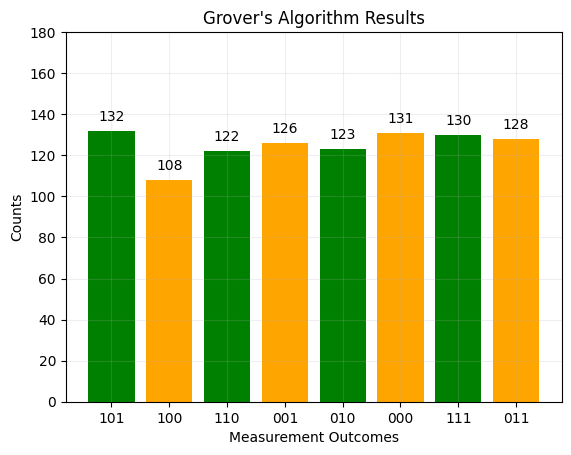

In [3]:
#-------------------------------------------------------------------------
# Grover’s Algorithm - More Complete
# Chapter 5 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import GroverOperator
#-------------------------------------------------------------------------

# Define the oracle
n = 3  # Number of qubits
oracle = QuantumCircuit(n)

# Mark |110⟩ as the solution
oracle.z(2) 
oracle = GroverOperator(oracle)

# Initialize the quantum circuit
qc = QuantumCircuit(n)

# Apply Hadamard gates to place all qc gates in superposition
qc.h(range(n))  

# Apply the oracle and diffusion operator
qc.append(oracle, range(n))

# Measure the result
qc.measure_all()

# Print the Quantum Circuit
qc.draw()

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job    = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts()
#print("Grover's Algorithm Results:", result.get_counts())
print("Grover's Algorithm Results:", counts)

#-------------------------------------------------------------------------
# Visualize Grover's Result
# Extract keys and values
labels = list(counts.keys())
values = list(counts.values())

# Create the histogram 
# Note: using matplotlib directly - qiskit plot_histogram(counts) is buggy
plt.bar(labels, values, color=['green', 'orange'])
plt.title("Grover's Algorithm Results")
plt.xlabel("Measurement Outcomes")
plt.grid(alpha=0.2)
plt.ylim(0, 180)
plt.ylabel("Counts")

# Add counts above the bars
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10, color='black')

plt.show()


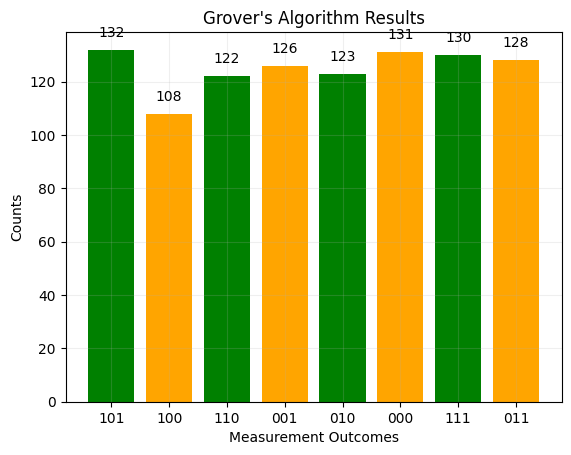

In [4]:

# Extract keys and values
labels = list(counts.keys())
values = list(counts.values())

# Create the histogram 
# Note: using matplotlib directly - qiskit plot_histogram(counts) is buggy
plt.bar(labels, values, color=['green', 'orange'])
plt.title("Grover's Algorithm Results")
plt.xlabel("Measurement Outcomes")
plt.grid(alpha=0.2)
plt.ylabel("Counts")

# Add counts above the bars
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10, color='black')

plt.show()
